This model was trained out of curiosity to compare the results with the results of the linear model from the assignment. It's not particularly refined: no fine tuning was done, no robustness checks, etc...

#### Imports

In [1]:
import pandas as pd
import numpy as np
import sklearn

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor

In [3]:
df = pd.read_csv('CFOPalgs_df.csv')

In [4]:
df.head()

,Label,Time,SHTM,Double,Risk,Overwork,Slice,SoftRegr,HardRegr
0,Aa,1.14,9,3,0.15,0,0,0,1
1,Ab,1.11,9,3,0.21,0,0,0,1
2,E,1.36,16,0,0.19,0,0,0,1
3,F,1.56,18,1,0.20,0,0,0,1
4,Ga,1.65,12,2,0.37,0,0,0,2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Label     78 non-null     object 
 1   Time      78 non-null     float64
 2   SHTM      78 non-null     int64  
 3   Double    78 non-null     int64  
 4   Risk      78 non-null     float64
 5   Overwork  78 non-null     int64  
 6   Slice     78 non-null     int64  
 7   SoftRegr  78 non-null     int64  
 8   HardRegr  78 non-null     int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 5.6+ KB


#### Random Forest Regressor

In [6]:
x = df.iloc[:,2:9].values
y = df.iloc[:,1].values

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = 4, test_size=0.2)

In [8]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)


In [9]:
print('Mean Absolute Error', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error 0.08131005952380954
Mean Squared Error 0.010399275097824524
Root Mean Squared Error 0.10197683608459582


In [10]:
np.mean(y_pred)

1.1854182738095238

In [11]:
np.std(y_pred)

0.2829259244330103

In [12]:
metrics.r2_score(y_test,y_pred)

0.9000396345453867

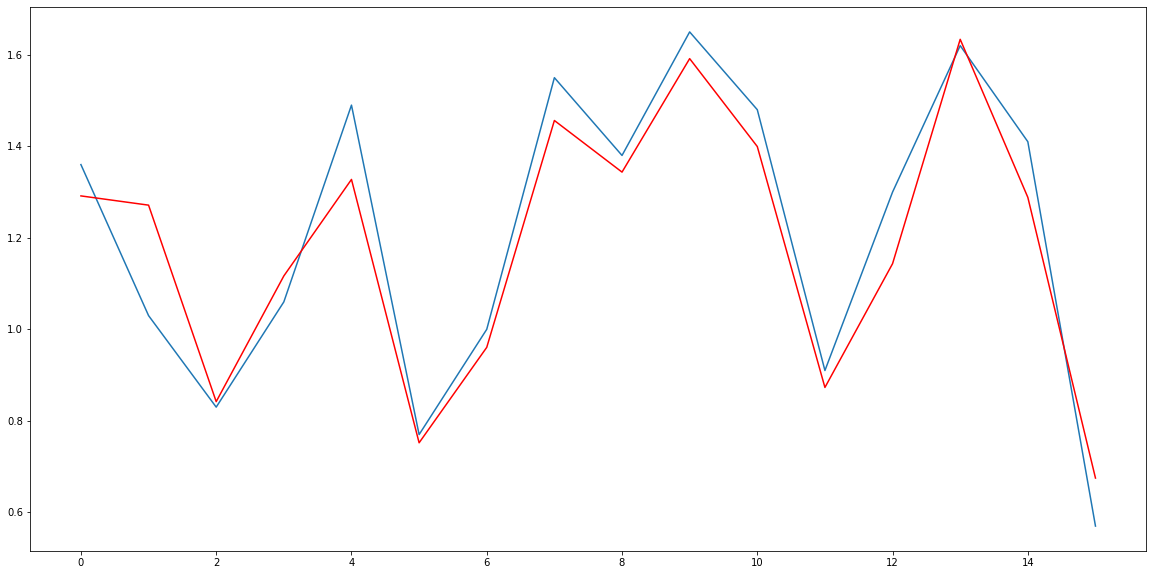

In [13]:
x_plot=np.arange(len(y_pred))
x_plot
np.ceil(len(y_pred)/100)

n=200
plt.figure(figsize=(20, 10))
plt.plot(x_plot[0:100],y_test[0:100])
plt.plot(x_plot[0:100],y_pred[0:100],c='r')
plt.show()

In [14]:
features = list(df.drop(columns=['Label','Time']).columns.values)

In [15]:
imp = rf.feature_importances_

In [16]:
d = {'Feature':features, 'Importance':imp}
feat = pd.DataFrame.from_dict(d)
feat = feat.sort_values(by = 'Importance', ascending = False)
feat['Importance'] = feat['Importance'].round(decimals = 2)
feat = feat.reset_index(drop = True)
feat.index += 1
feat

,Feature,Importance
1,SHTM,0.45
2,Risk,0.38
3,HardRegr,0.05
4,Overwork,0.05
5,Double,0.03
6,SoftRegr,0.02
7,Slice,0.01
